# World 2017 Export Partner Share

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# This is a custom matplotlib style that I use for most of my charts
plt.style.use('tableau10.mplstyle')

age_gender_data = pd.read_csv('WITS-Partner.csv')
age_gender_data.head()


Bad key "axes.color_cycle" on line 17 in
tableau10.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


,Partner_Name,No_Of_exported_HS6_digit_Products,Export_Share_in_Total_Products,Export
0,Aruba,2942,62.77,1617136.12
1,Afghanistan,2980,63.58,5361910.28
2,Angola,3956,84.40,11202135.62
3,Anguila,1102,23.51,94975.63
4,Albania,3854,82.23,4921342.19


#Problems with the population pyramid

###1) 表格喔!

''

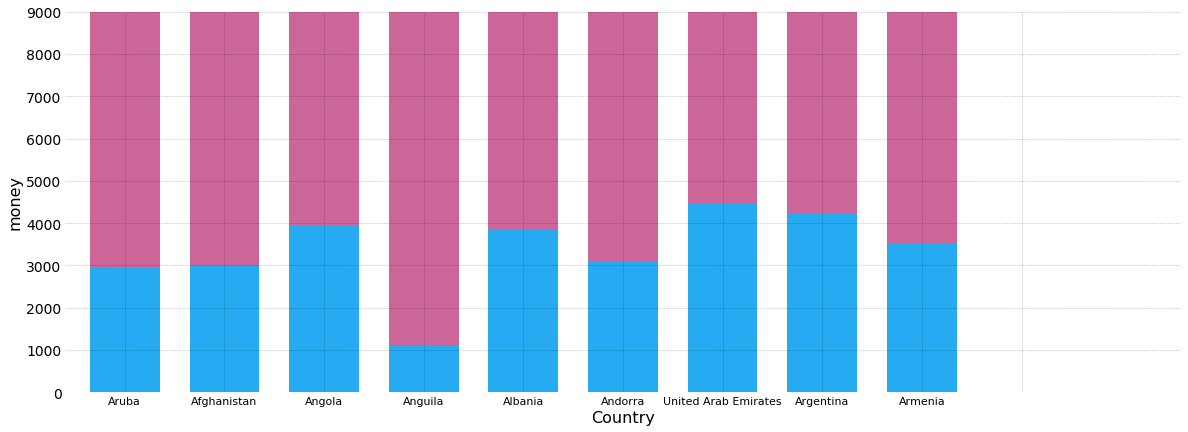

In [49]:
fig = plt.figure(figsize=(20, 7))
ax1 = fig.add_subplot(111)

for (i, row) in age_gender_data.iterrows():
    plt.bar([i, i], [row['Export'], row['No_Of_exported_HS6_digit_Products']],
            color=['#CC6699' ,'#26AAF1'], width=0.7, align='center', edgecolor='none')
    
plt.xlim(-0.6, 10.6)
plt.ylim(0, 5.1e3)
#plt.grid(False, axis='x')
plt.xticks(np.arange(0, 10), age_gender_data['Partner_Name'], fontsize=11)
plt.yticks(np.arange(0, 10e3, 1e3))
## ,           ['{}m'.format(int(abs(x) / 1e6)) if x != 0 else 0 for x in np.arange(-12e3, 13e3, 2e3)])
plt.xlabel('Country')
plt.ylabel('money')

plt.savefig('pop_pyramid_rotated.pdf')
;

###2) Doesn't allow direct comparisons between the two categories.

''

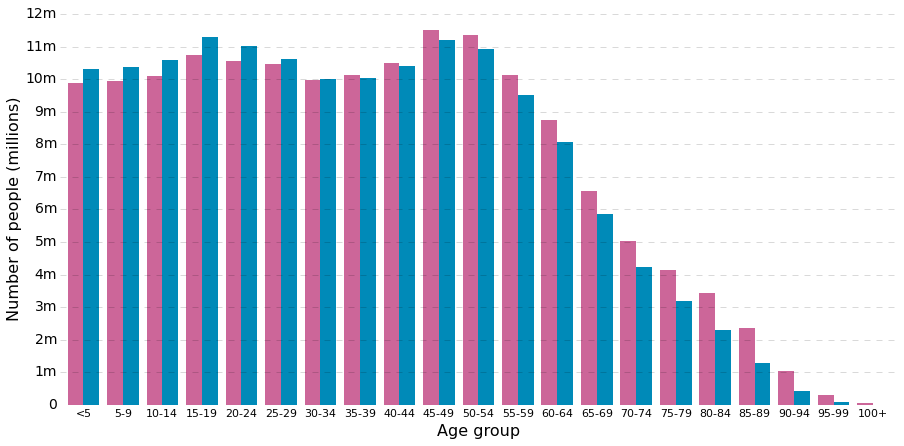

In [3]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i, row) in age_gender_data.iterrows():
    plt.bar([i - 0.2, i + 0.2], [row['Females_2010'], row['Males_2010']],
            color=['#CC6699', '#008AB8'], width=0.4, align='center', edgecolor='none')
    
plt.xlim(-0.6, 20.6)
plt.xticks(range(0, 21), age_gender_data['Age_Range'], fontsize=11)
plt.grid(False, axis='x')
plt.yticks(np.arange(0, 13e6, 1e6),
           ['{}m'.format(int(x / 1e6)) if x > 0 else 0 for x in np.arange(0, 13e6, 1e6)])
plt.xlabel('Age group')
plt.ylabel('Number of people (millions)')

plt.savefig('pop_pyramid_grouped.pdf')
;

###3) Relative trends between the categories can be masked by displaying absolute values.

''

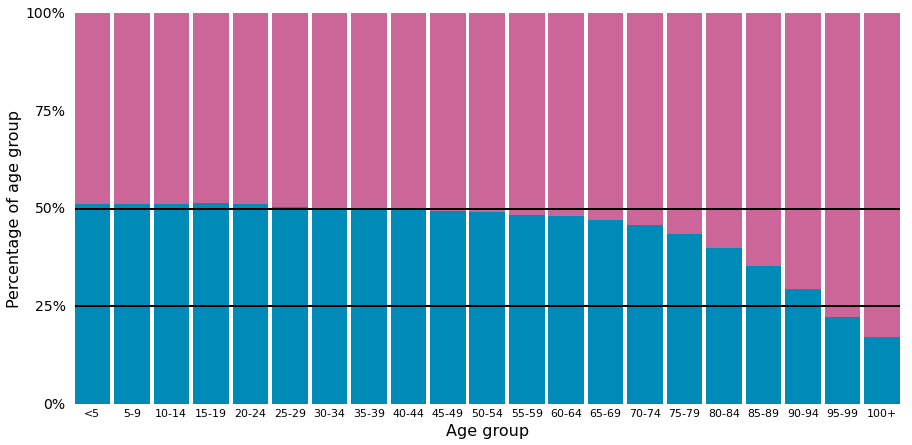

In [4]:
age_gender_data['Male_Pct'] = age_gender_data['Males_2010'] / age_gender_data['Total_Pop_2010']
age_gender_data['Female_Pct'] = age_gender_data['Females_2010'] / age_gender_data['Total_Pop_2010']

plt.figure(figsize=(15, 7))

for (i, row) in age_gender_data.iterrows():
    plt.bar([i], [row['Male_Pct']],
            color=['#008AB8'], width=0.9, align='center', edgecolor='none')
    plt.bar([i], [row['Female_Pct']], bottom=[row['Male_Pct']],
            color=['#CC6699'], width=0.9, align='center', edgecolor='none')
    
plt.xlim(-0.6, 20.6)
plt.ylim(0, 1)
plt.xticks(range(0, 21), age_gender_data['Age_Range'], fontsize=11)
plt.grid(False)
plt.yticks(np.arange(0, 1.01, 0.25),
           ['{}%'.format(int(x * 100)) for x in np.arange(0, 1.01, 0.25)])
plt.xlabel('Age group')
plt.ylabel('Percentage of age group')

plt.plot([-0.425, 20.425], [0.5, 0.5], lw=2, color='black')
plt.plot([-0.425, 20.425], [0.25, 0.25], lw=2, color='black')

plt.savefig('pop_pyramid_stacked.pdf')
;